In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import itertools
import datetime

%matplotlib inline
import os

import random

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_excel("EC48W.xlsx")

In [3]:
data.head()

,Timestamp,IRS,USD T,DXY
0,2019-07-19,1.7799,1.780,97.151
1,2019-07-18,1.7311,1.750,96.794
2,2019-07-17,1.7848,1.807,97.223
3,2019-07-16,1.8350,1.844,97.395
4,2019-07-15,1.8090,1.812,96.933


In [135]:
data.describe()

,IRS,USD T,DXY
count,2345.000000,2345.000000,2345.000000
mean,1.320922,1.147684,88.204290
std,0.708818,0.720709,8.385531
min,0.420000,0.279000,72.933000
25%,0.809000,0.625000,80.252000
50%,1.099000,0.949000,89.623000
75%,1.689000,1.480000,96.077000
max,3.185000,3.045000,103.300000


In [5]:
data.corr()

,IRS,USD T,DXY
IRS,1.000000,0.992555,0.570571
USD T,0.992555,1.000000,0.607625
DXY,0.570571,0.607625,1.000000


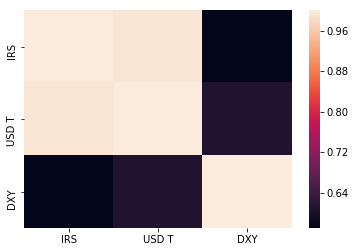

In [6]:
sns.heatmap(data.corr())

In [7]:
X = data["IRS"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data["USD T"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
Z = data["DXY"].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

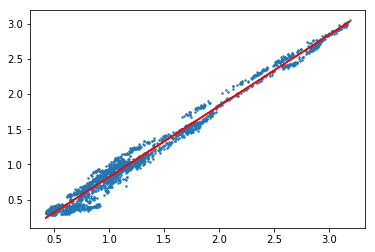

In [8]:
#linear regression line for IRS and USD T
plt.scatter(X, Y,s=2)
plt.plot(X, Y_pred, color='red')
plt.show()

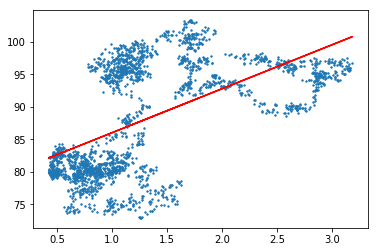

In [9]:
#linear regression line for IRS and DXY

Z = data["DXY"].values.reshape(-1, 1)
plt.scatter(X, Z,s=2)
linear_regressor.fit(X, Z)
Z_pred = linear_regressor.predict(X)
plt.plot(X, Z_pred, color='red')
plt.show()

In [10]:
#LET'S SEE CAN WE USE THESE DATA TO ASSUME NORMAL DISTRIBUTION FOR MONTE CARLO SIMULATION
change_IRS = []
for i in range(0,len(data["IRS"])-1):
        change_IRS.append((data["IRS"][i]-data["IRS"][i+1]) / data["IRS"][i+1])
change_IRS.reverse()

In [11]:
change_USDT = []
for i in range(0,len(data["USD T"])-1):
        change_USDT.append((data["USD T"][i]-data["USD T"][i+1]) / data["USD T"][i+1])
change_USDT.reverse()

In [12]:
change_DXY = []
for i in range(0,len(data["DXY"])-1):
        change_DXY.append((data["DXY"][i]-data["DXY"][i+1]) / data["DXY"][i+1])
change_DXY.reverse()

In [13]:
dict_change = {"IRS Change": change_IRS , "USD T Change": change_USDT , "DXY Change": change_DXY}  
    
data_change = pd.DataFrame(dict_change) 

In [14]:
data_change.head()

,IRS Change,USD T Change,DXY Change
0,0.033023,0.061975,0.001194
1,-0.080328,-0.069238,-0.000073
2,-0.024064,-0.062699,-0.006608
3,-0.031963,-0.064626,-0.001188
4,0.000943,0.026667,-0.007371


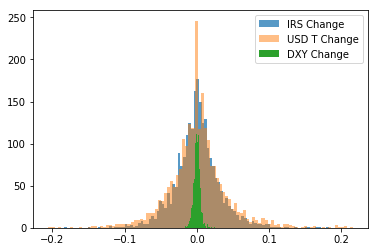

In [17]:
plt.hist(data_change["IRS Change"], bins=100, alpha=0.75, label="IRS Change")
plt.hist(data_change["USD T Change"], bins=100, alpha=0.5, label="USD T Change")
plt.hist(data_change["DXY Change"], bins=100, alpha=1, label="DXY Change")
plt.legend(loc='upper right')
plt.show()

In [18]:
dataa = data.iloc[:,0:3].copy()
dataa["DXY/100"] = data["DXY"]/100
dataa.head()

,Timestamp,IRS,USD T,DXY/100
0,2019-07-19,1.7799,1.780,0.97151
1,2019-07-18,1.7311,1.750,0.96794
2,2019-07-17,1.7848,1.807,0.97223
3,2019-07-16,1.8350,1.844,0.97395
4,2019-07-15,1.8090,1.812,0.96933


/Users/FurkanDemirbas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


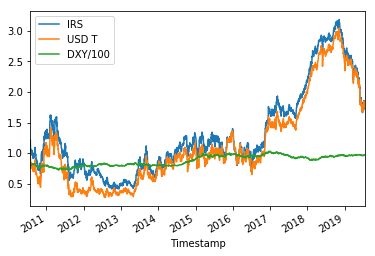

In [19]:
dataa.time = pd.to_datetime(dataa["Timestamp"], format='%Y-%m-%d')
dataa.set_index(['Timestamp'],inplace=True)
dataa.plot()

In [ ]:
#WE HAVE COMPLETED DATA EXPLORATION
#NOW, LET'S FOCUS ON LINEAR REGRESSION

In [169]:
week_excel = pd.read_excel("Week.xlsx")

In [170]:
week_excel.head()

,Timestamp,LastDay
0,2010-07-30,81.539
1,2010-08-06,80.407
2,2010-08-13,82.948
3,2010-08-20,83.057
4,2010-08-27,82.918


In [171]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

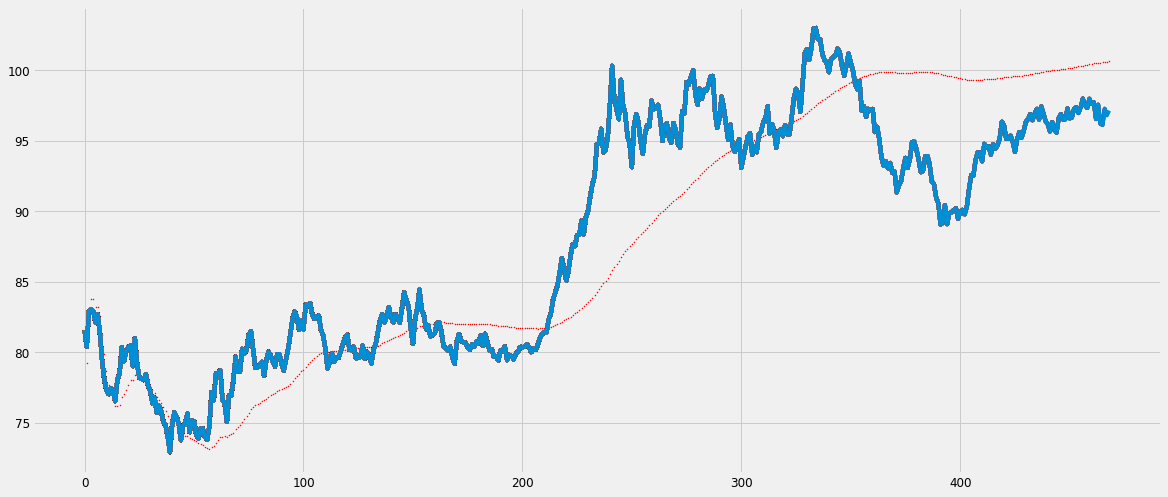

In [172]:
for i in range(0,469):
    Week_train = week_excel.index[:i+1]
    Dxy_train = week_excel["LastDay"][:i+1]
    linear_regressor.fit(Week_train.values.reshape(-1, 1), Dxy_train.values.reshape(-1, 1)) 
    Dxy_predict= linear_regressor.predict(Week_train.values.reshape(-1, 1)) 
    plt.plot(Week_train, Dxy_train)
    plt.scatter(Week_train[i], linear_regressor.predict([[i+1]]), color='red', s=1)


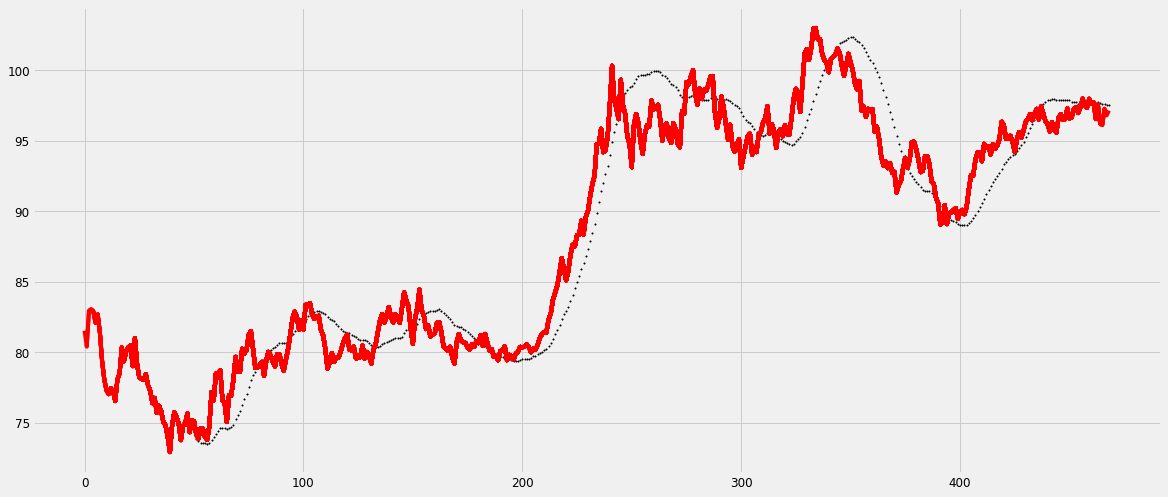

In [173]:
for i in range(0,418):
    Week_train = week_excel.index[i:52+i]
    Dxy_train = week_excel["LastDay"][i:52+i]
    linear_regressor.fit(Week_train.values.reshape(-1, 1), Dxy_train.values.reshape(-1, 1)) 
    Dxy_predict= linear_regressor.predict(Week_train.values.reshape(-1, 1)) 
    plt.plot(Week_train, Dxy_train, color="red")
    plt.scatter(Week_train[51], linear_regressor.predict([[i+51]]), color='black', s=2)

In [174]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [175]:
fri_df = pd.read_excel("week.xlsx")

In [176]:
fri_df.head()

,Timestamp,LastDay
0,2010-07-30,81.539
1,2010-08-06,80.407
2,2010-08-13,82.948
3,2010-08-20,83.057
4,2010-08-27,82.918


In [177]:
fri_df.tail()

,Timestamp,LastDay
464,2019-06-21,96.220
465,2019-06-28,96.130
466,2019-07-05,97.286
467,2019-07-12,96.810
468,2019-07-19,97.151


In [178]:
fri_df.isnull().sum()

Timestamp    0
LastDay      0
dtype: int64

In [179]:
fri_df = fri_df.groupby('Timestamp')['LastDay'].sum().reset_index()

In [180]:
fri_df = fri_df.set_index("Timestamp")
fri_df.index

DatetimeIndex(['2010-07-30', '2010-08-06', '2010-08-13', '2010-08-20',
               '2010-08-27', '2010-09-03', '2010-09-10', '2010-09-17',
               '2010-09-24', '2010-10-01',
               ...
               '2019-05-17', '2019-05-24', '2019-05-31', '2019-06-07',
               '2019-06-14', '2019-06-21', '2019-06-28', '2019-07-05',
               '2019-07-12', '2019-07-19'],
              dtype='datetime64[ns]', name='Timestamp', length=469, freq=None)

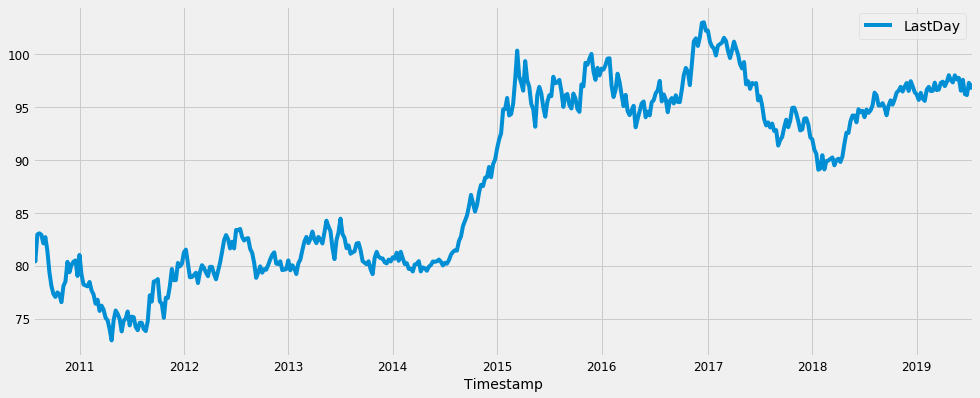

In [181]:
fri_df.plot(figsize=(15, 6))
plt.show()

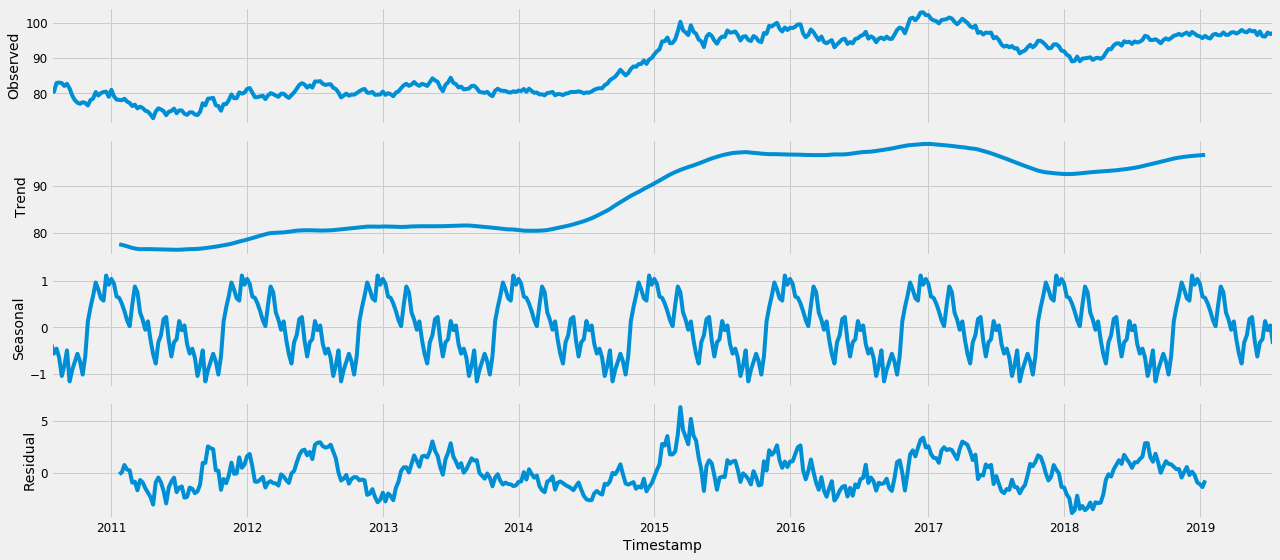

In [182]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(fri_df, model='additive')
fig = decomposition.plot()
plt.show()


In [183]:
mod = sm.tsa.statespace.SARIMAX(fri_df,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0220      0.041     -0.536      0.592      -0.102       0.058
ma.S.L12      -1.0000    281.312     -0.004      0.997    -552.362     550.362
sigma2         0.7639    214.895      0.004      0.997    -420.423     421.951


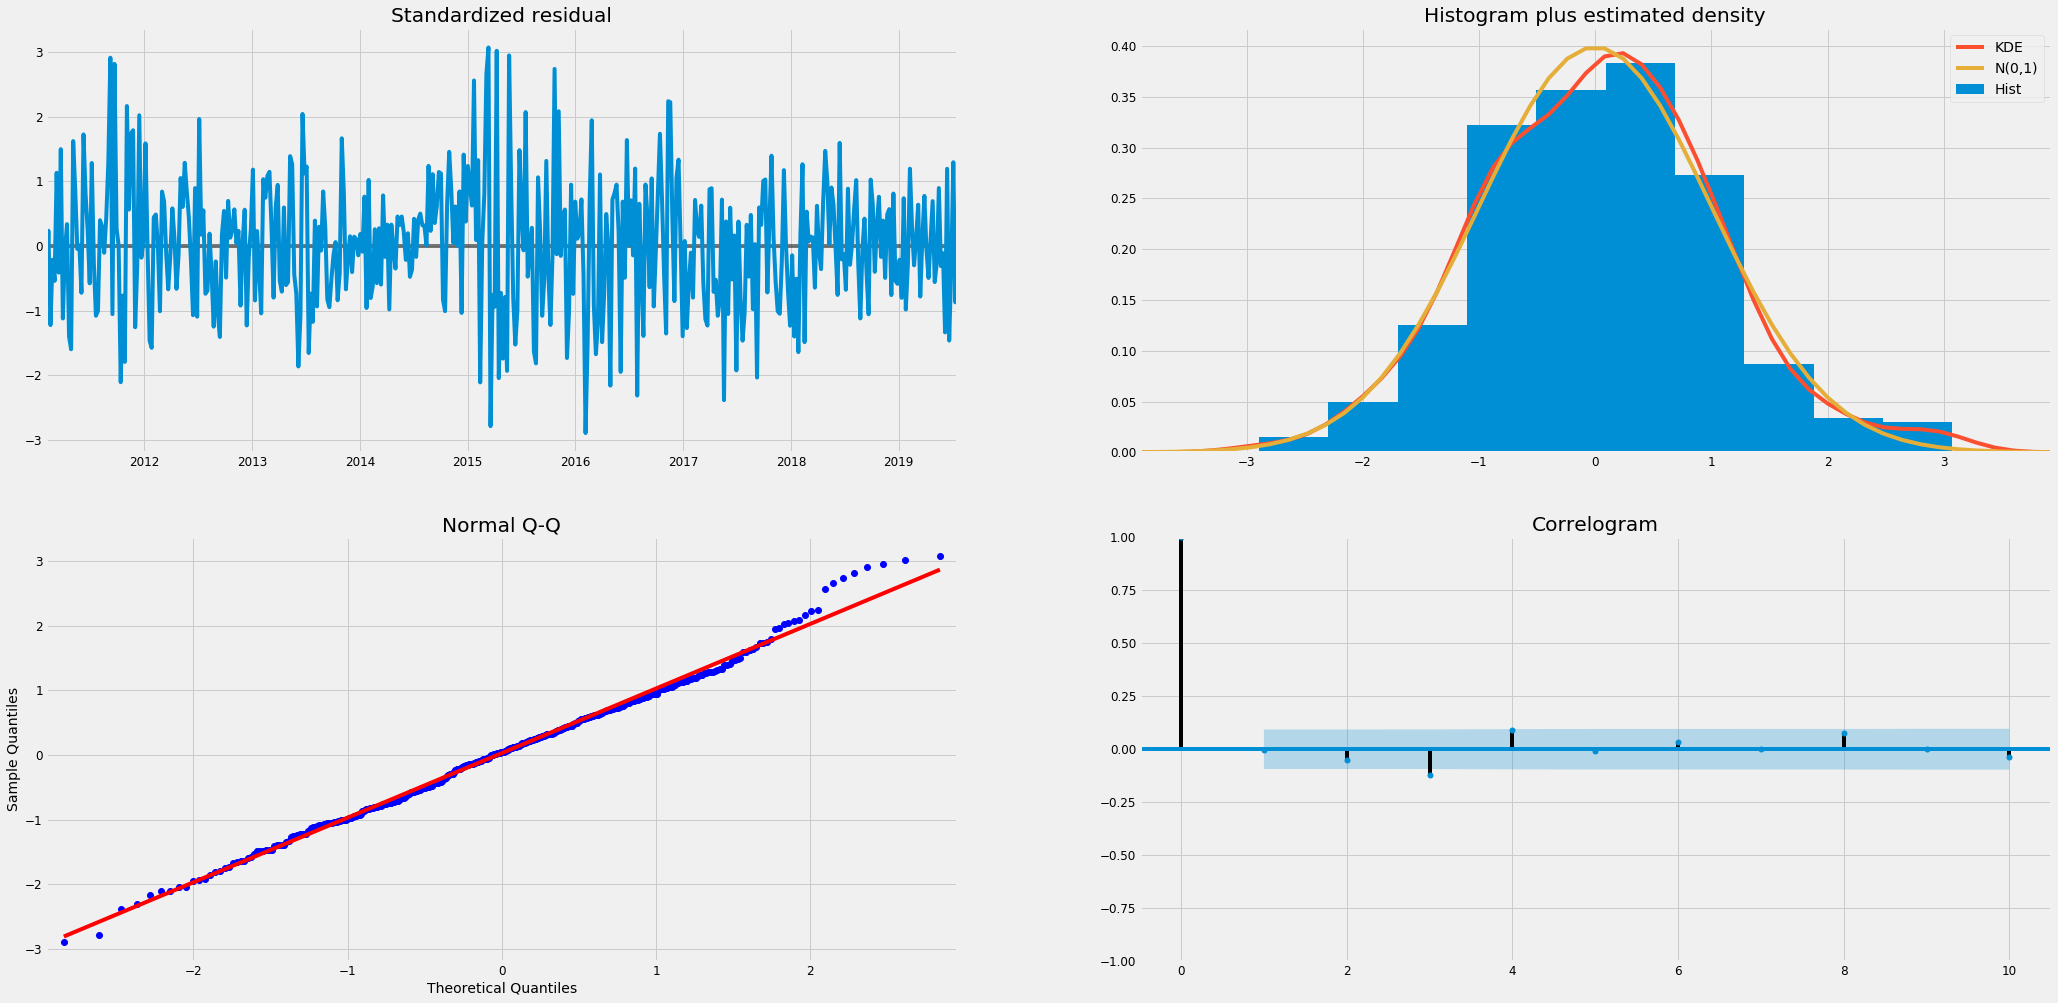

In [184]:
results.plot_diagnostics(figsize=(32, 16))
plt.show()

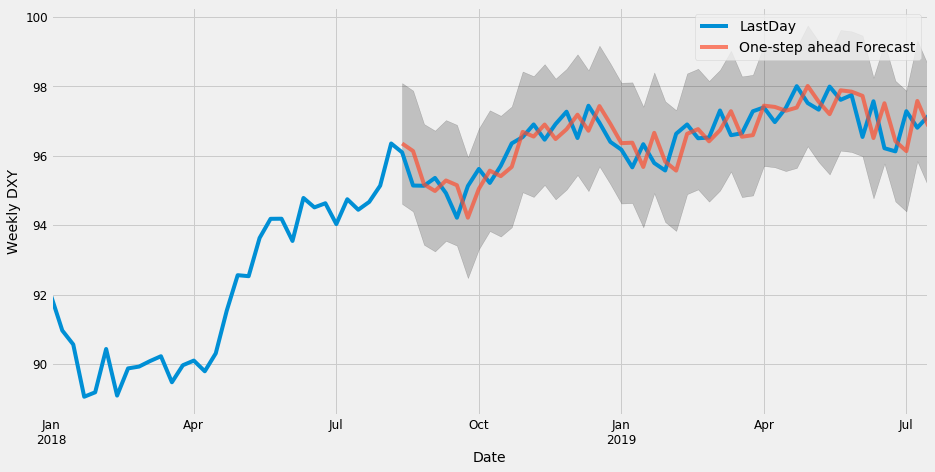

In [185]:
pred = results.get_prediction(start=fri_df.index[420], dynamic=False)
pred_ci = pred.conf_int()
ax = fri_df['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly DXY')
plt.legend()
plt.show()

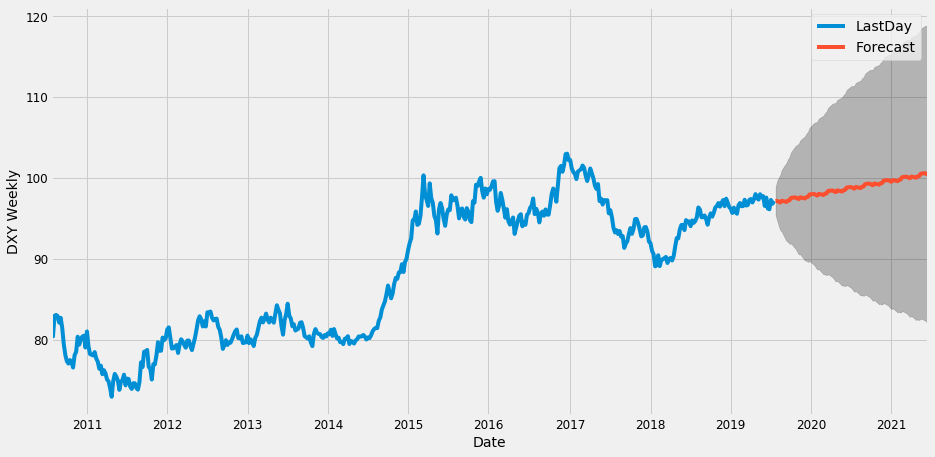

In [186]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = fri_df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('DXY Weekly')
plt.legend()
plt.show()

In [20]:
#WE HAVE COMPLETED DATA EXPLORATION
#THE WEEKLY CHANGE DATA WE HAVE CONSTITUTED ON EXCEL
w_change = pd.read_excel("change.xlsx")

In [21]:
w_change.describe()

,Week,Weekly ChangeDXY,Weekly ChangeIRS
count,469.000000,469.000000,469.000000
mean,235.000000,0.000425,0.003932
std,135.532899,0.009357,0.065461
min,1.000000,-0.023852,-0.215608
25%,118.000000,-0.005527,-0.034243
50%,235.000000,0.000246,-0.001401
75%,352.000000,0.006502,0.033333
max,469.000000,0.029722,0.392801


In [22]:
w_change.head()

,Date,Week,Weekly ChangeDXY,Weekly ChangeIRS
0,2010-07-26,1,-0.006676,-0.102456
1,2010-08-02,2,-0.006561,-0.039585
2,2010-08-09,3,0.027716,-0.035951
3,2010-08-16,4,0.006349,0.037037
4,2010-08-23,5,-0.002466,-0.009278


In [23]:
m_w260_DXY = []
for i in range(0,208):
    m_ch = np.mean(w_change["Weekly ChangeDXY"][i:i + 259])
    m_w260_DXY.append(m_ch)

In [24]:
std_w260_DXY = []
for i in range(0,208):
    std_ch = np.std(w_change["Weekly ChangeDXY"][i:i + 259])
    std_w260_DXY.append(std_ch)

In [25]:
conf95_maxloss_w260_DXY = []
for i in range(0,len(m_w260_DXY)):
    conf_ch = m_w260_DXY[i] - (1.645 * std_w260_DXY[i])
    conf95_maxloss_w260_DXY.append(conf_ch)

In [26]:
result_DXY = []
for i in range(0,208):
    a=w_change["Weekly ChangeDXY"][261+i] > conf95_maxloss_w260_DXY[i]
    result_DXY.append(a)

In [27]:
m_w260_IRS = []
for i in range(0,208):
    m_ch = np.mean(w_change["Weekly ChangeIRS"][i:i + 259])
    m_w260_IRS.append(m_ch)

In [28]:
std_w260_IRS = []
for i in range(0,208):
    std_ch = np.std(w_change["Weekly ChangeIRS"][i:i + 259])
    std_w260_IRS.append(std_ch)

In [29]:
conf95_maxloss_w260_IRS = []
for i in range(0,len(m_w260_IRS)):
    conf_ch = m_w260_IRS[i] - (1.645 * std_w260_IRS[i])
    conf95_maxloss_w260_IRS.append(conf_ch)

In [30]:
result_IRS = []
for i in range(0,208):
    a=w_change["Weekly ChangeIRS"][261+i] > conf95_maxloss_w260_IRS[i]
    result_IRS.append(a)

In [31]:
test_df=pd.DataFrame({"Mean 260 Week DXY" : m_w260_DXY,
                      "Standart Dev 260 Week DXY" : std_w260_DXY,
                      "Confidence Interval Max Loss DXY" : conf95_maxloss_w260_DXY,
                      "Result DXY" : result_DXY,
                      "Mean 260 Week IRS":m_w260_IRS,
                      "Standart Dev 260 Week IRS":std_w260_IRS,
                      "Confidence Interval Max Loss IRS":conf95_maxloss_w260_IRS,
                      "Result IRS":result_IRS
                     })

In [32]:
test_df.head()

,Mean 260 Week DXY,Standart Dev 260 Week DXY,Confidence Interval Max Loss DXY,Result DXY,Mean 260 Week IRS,Standart Dev 260 Week IRS,Confidence Interval Max Loss IRS,Result IRS
0,0.000671,0.010018,-0.015808,True,0.006037,0.077071,-0.120744,True
1,0.000737,0.010025,-0.015755,True,0.006393,0.076781,-0.119912,True
2,0.000731,0.010030,-0.015768,True,0.006414,0.076769,-0.119872,True
3,0.000657,0.009900,-0.015629,False,0.006530,0.076728,-0.119687,True
4,0.000636,0.009894,-0.015640,True,0.006645,0.076795,-0.119684,True


In [34]:
#DEMO1
#assume we are in 260th week, curious about change in IRS arises from previous data.
currentweek = test_df[0:1]

In [36]:
currentweek
#since 260 weeks ago, DXY weekly change mean is 0.000671 and we expect max loss of -0.015808 with 95% confidence in week 261

#since 260 weeks ago, IRS weekly change mean is 0.077071 and we expect max loss of -0.120744 with 95% confidence in week 261


,Mean 260 Week DXY,Standart Dev 260 Week DXY,Confidence Interval Max Loss DXY,Result DXY,Mean 260 Week IRS,Standart Dev 260 Week IRS,Confidence Interval Max Loss IRS,Result IRS
0,0.000671,0.010018,-0.015808,True,0.006037,0.077071,-0.120744,True


In [37]:
#Let's see what does linear regression says about our max loss expectation in IRS.

In [38]:
change_excel = pd.read_excel("change.xlsx")
change_excel.head()

,Date,Week,Weekly ChangeDXY,Weekly ChangeIRS
0,2010-07-26,1,-0.006676,-0.102456
1,2010-08-02,2,-0.006561,-0.039585
2,2010-08-09,3,0.027716,-0.035951
3,2010-08-16,4,0.006349,0.037037
4,2010-08-23,5,-0.002466,-0.009278


In [39]:
dataaa = test_df.iloc[0:469,0:9].copy()
dataaa.head()

,Mean 260 Week DXY,Standart Dev 260 Week DXY,Confidence Interval Max Loss DXY,Result DXY,Mean 260 Week IRS,Standart Dev 260 Week IRS,Confidence Interval Max Loss IRS,Result IRS
0,0.000671,0.010018,-0.015808,True,0.006037,0.077071,-0.120744,True
1,0.000737,0.010025,-0.015755,True,0.006393,0.076781,-0.119912,True
2,0.000731,0.010030,-0.015768,True,0.006414,0.076769,-0.119872,True
3,0.000657,0.009900,-0.015629,False,0.006530,0.076728,-0.119687,True
4,0.000636,0.009894,-0.015640,True,0.006645,0.076795,-0.119684,True


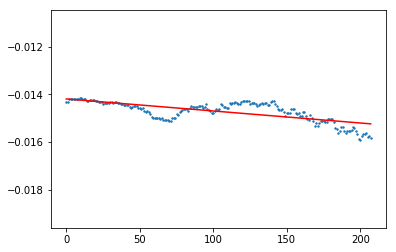

In [40]:
AAA = dataaa.index.values.reshape(-1, 1)
BBB = dataaa[::-1]["Confidence Interval Max Loss DXY"].values.reshape(-1, 1)  
linear_dxy_regressor = LinearRegression() 
linear_dxy_regressor.fit(AAA, BBB) 
BBB_pred = linear_dxy_regressor.predict(AAA) 
plt.scatter(AAA, BBB,s=2)
plt.plot(AAA, BBB_pred, color='red')
plt.show()

In [53]:
mean_squared_error(BBB, BBB_pred)

9.685387294366597e-06

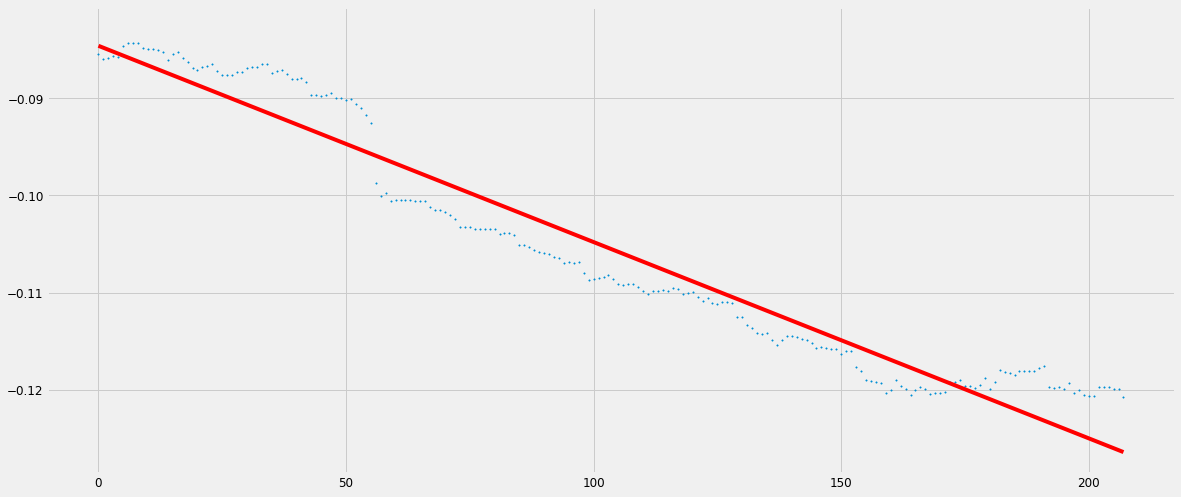

In [151]:
AAA = dataaa.index.values.reshape(-1, 1)
BBB = dataaa[::-1]["Confidence Interval Max Loss IRS"].values.reshape(-1, 1)  
linear_irs_regressor = LinearRegression() 
linear_irs_regressor.fit(AAA, BBB) 
BBB_pred = linear_irs_regressor.predict(AAA) 
plt.scatter(AAA, BBB,s=2)
plt.plot(AAA, BBB_pred, color='red')
plt.show()

In [152]:
linear_dxy_regressor.predict([[261]])
#linear regression expects a lower level of max loss

array([[-0.01550719]])

In [153]:
w_change[260:261]
#and actual weekly change keeps our max loss expectation from linear regression as valid. 

,Date,Week,Weekly ChangeDXY,Weekly ChangeIRS
260,2015-07-20,261,-0.008008,-0.034161


In [163]:
result_MCDXY = []
for i in range(0,208):
    a=w_change["Weekly ChangeDXY"][i+261] > linear_dxy_regressor.predict([[i+261]])
    result_MCDXY.append(a)

In [164]:
result_MCDXY.count(True)

200

In [165]:
result_MCDXY.count(False)

8

In [166]:
result_MCIRS = []
for i in range(0,208):
    a=w_change["Weekly ChangeIRS"][i+261] > linear_dxy_regressor.predict([[i+261]])
    result_MCIRS.append(a)

In [167]:
result_MCIRS.count(True)

149

In [168]:
result_MCIRS.count(False)

59

In [46]:
linear_irs_regressor.predict([[261]])
#linear regression expects a higher level of max loss

array([[-0.13727642]])

In [47]:
w_change[260:261]
#and actual weekly change keeps our max loss expectation from linear regression as invalid. 
#In a decreasing rates environment, linear regression can boost short positions for IRS. 

,Date,Week,Weekly ChangeDXY,Weekly ChangeIRS
260,2015-07-20,261,-0.008008,-0.034161


In [50]:
week_excel = pd.read_excel("Week.xlsx")

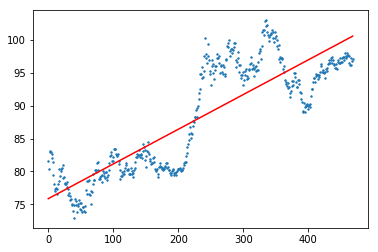

In [51]:
AAAA = week_excel.index.values.reshape(-1, 1)
BBBB = week_excel["LastDay"].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(AAAA, BBBB) 
BBBB_pred = linear_regressor.predict(AAAA) 
plt.scatter(AAAA, BBBB,s=2)
plt.plot(AAAA, BBBB_pred, color='red')
plt.show()

In [52]:
mean_squared_error(BBBB, BBBB_pred)

19.25754917415235

In [ ]:
#k-NN STUDY FOR DIFFERENT PERIODS IN OUR DATA

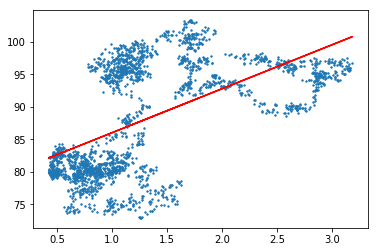

In [54]:
#linear regression line for IRS and DXY

Z = data["DXY"].values.reshape(-1, 1)
plt.scatter(X, Z,s=2)
linear_regressor.fit(X, Z)
Z_pred = linear_regressor.predict(X)
plt.plot(X, Z_pred, color='red')
plt.show()

In [55]:
data1517 = data[(dataa.time >= '2015-01-1') & (dataa.time < '2017-01-1')]
data__15 = data[(dataa.time < '2015-01-1')]
data17__ = data[(dataa.time >= '2017-01-1')]

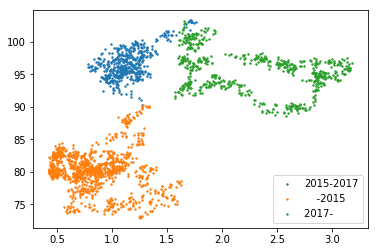

In [56]:
plt.scatter(data1517["IRS"],data1517["DXY"],s=2, label="2015-2017")
plt.scatter(data__15["IRS"],data__15["DXY"],s=2, label="    -2015")
plt.scatter(data17__["IRS"],data17__["DXY"],s=2, label="2017-     ")
plt.legend(loc='lower right')
plt.show()

In [57]:
dataset = pd.read_excel("EC48W.xlsx")

In [58]:
dataset.head()

,Timestamp,IRS,USD T,DXY
0,2019-07-19,1.7799,1.780,97.151
1,2019-07-18,1.7311,1.750,96.794
2,2019-07-17,1.7848,1.807,97.223
3,2019-07-16,1.8350,1.844,97.395
4,2019-07-15,1.8090,1.812,96.933


In [59]:
Year_Interval = []
for i in range(0,len(dataset.IRS)):
    if i <= 665:
        Year_Interval.append("2017-2019") 
    elif  i <= 1187:
        Year_Interval.append("2015-2017") 
    else:
        Year_Interval.append("2010-2015") 
dataset["Year Interval"] = Year_Interval

In [61]:
dataset.head()

,Timestamp,IRS,USD T,DXY,Year Interval
0,2019-07-19,1.7799,1.780,97.151,2017-2019
1,2019-07-18,1.7311,1.750,96.794,2017-2019
2,2019-07-17,1.7848,1.807,97.223,2017-2019
3,2019-07-16,1.8350,1.844,97.395,2017-2019
4,2019-07-15,1.8090,1.812,96.933,2017-2019


In [62]:
x = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [99]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=200)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=200, p=2,
           weights='uniform')

In [100]:
y_pred = classifier.predict(X_test)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[454   9   0]
 [  0 207   6]
 [  0   0 262]]
              precision    recall  f1-score   support

   2010-2015       1.00      0.98      0.99       463
   2015-2017       0.96      0.97      0.97       213
   2017-2019       0.98      1.00      0.99       262

   micro avg       0.98      0.98      0.98       938
   macro avg       0.98      0.98      0.98       938
weighted avg       0.98      0.98      0.98       938



In [102]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

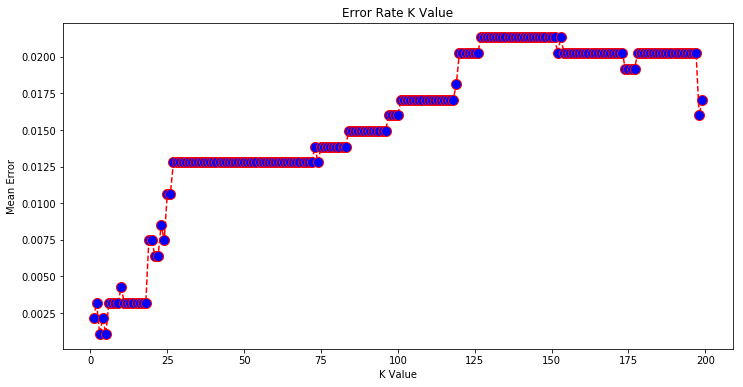

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 200), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [104]:
df=pd.DataFrame(x_test, columns = ["IRS", "USD T", "DXY"])
df["Prediction"] = y_pred
pred1015 = df[df["Prediction"] == "2010-2015"]
pred1517 = df[df["Prediction"] == "2015-2017"]
pred1719 = df[df["Prediction"] == "2017-2019"]

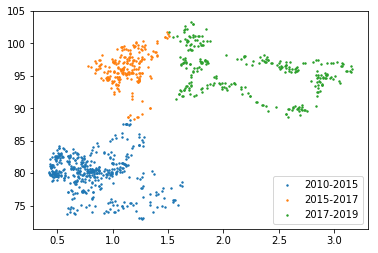

In [105]:
plt.scatter(pred1015["IRS"],pred1015["DXY"],s=2, label="2010-2015")
plt.scatter(pred1517["IRS"],pred1517["DXY"],s=2, label="2015-2017")
plt.scatter(pred1719["IRS"],pred1719["DXY"],s=2, label="2017-2019")
plt.legend(loc="lower right")
plt.show()                         

In [106]:
df

,IRS,USD T,DXY,Prediction
0,1.6640,1.454,96.984,2017-2019
1,0.8060,0.712,80.286,2010-2015
2,1.0600,0.976,94.863,2015-2017
3,3.0418,2.891,94.193,2017-2019
4,1.4600,1.237,76.217,2010-2015
5,0.6790,0.361,77.017,2010-2015
6,1.6730,1.416,100.260,2017-2019
7,1.0483,0.973,96.283,2015-2017
8,1.0880,0.901,85.532,2010-2015
9,0.4580,0.383,79.919,2010-2015
